In [51]:
import numpy as np
import pandas as pd
from spec_id import Scale_model,Gen_spec,Median_w_Error_cont
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import grizli
from glob import glob
from scipy.interpolate import interp1d
import os
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)
pandas2ri.activate()

### set home for files
hpath = os.environ['HOME'] + '/'

In [2]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
lzDB = galDB.query('z_grism < 1.16')
mzDB = galDB.query('1.16 < z_grism < 1.3')
hzDB = galDB.query('1.3 < z_grism < 1.45')
uhzDB = galDB.query('1.45 < z_grism')


metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
dust=np.round(np.arange(0.0,1.1,0.1),1)
M,A=np.meshgrid(metal,age)

In [55]:
lzDB.sort_values('z_grism')

,gids,z_grism,z_grism_+,z_grism_-,Z,Z_l,Z_h,Zx,Zx_l,Zx_h,...,d_l,d_h,dx,dx_l,dx_h,l_mass,SNR,rf_lmass,UV,VJ
0,n16758,1.015,0.002405,0.002405,0.023,0.006,0.005,0.022986,0.006004,0.004882,...,0.070,0.100,0.096192,0.066132,0.104208,10.83,10.148602,10.85,2.020510,1.424767
14,s39241,1.017,0.002405,0.002405,0.024,0.006,0.004,0.023884,0.005555,0.004265,...,0.200,0.049,0.210421,0.110220,0.138277,10.87,12.383246,10.87,1.955526,1.163373
24,s42221,1.018,0.004810,0.004810,0.022,0.010,0.006,0.021864,0.009932,0.005723,...,0.216,0.115,0.220441,0.136273,0.194389,10.51,7.666466,10.51,1.781392,1.055335
25,s43615,1.020,0.002405,0.004810,0.022,0.008,0.005,0.021078,0.007463,0.006060,...,0.175,0.209,0.498998,0.174349,0.210421,10.69,6.920919,10.69,2.026586,1.396011
13,s39170,1.023,0.002405,0.002405,0.023,0.006,0.005,0.022986,0.006172,0.004994,...,0.074,0.078,0.086172,0.060120,0.092184,11.09,20.847010,11.09,2.065809,1.138585
9,n37955,1.027,0.004810,0.002405,0.021,0.012,0.006,0.020124,0.011615,0.007238,...,0.277,0.222,0.569138,0.246493,0.252505,10.85,7.301576,10.84,1.988622,1.294053
28,s45972,1.041,0.002405,0.002405,0.015,0.006,0.008,0.014681,0.005387,0.008810,...,0.150,0.061,0.138277,0.088176,0.122244,10.87,12.325639,10.87,1.895069,1.150123
15,s39631,1.057,0.002405,0.009619,0.015,0.007,0.009,0.014569,0.006677,0.009539,...,0.200,0.079,0.226453,0.126253,0.152305,10.69,9.169197,10.68,1.944206,1.106997
30,s47677,1.117,0.002405,0.004810,0.021,0.009,0.006,0.020124,0.008417,0.006902,...,0.258,0.131,0.308617,0.166333,0.222445,10.09,4.243051,10.18,1.758070,1.127772
4,n23435,1.139,0.004810,0.007214,0.014,0.008,0.011,0.014008,0.008192,0.010661,...,0.218,0.253,0.382766,0.200401,0.270541,10.27,4.401724,10.31,1.806509,1.149128


In [56]:
sp = Gen_spec('s39170',1.023)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

In [46]:
lwa_grid_t = np.load('../data/light_weight_scaling_t.npy')

In [47]:
lwa_grid_t.shape

(31, 56)

In [25]:
lwa_grid = np.load('../data/light_weight_scaling_3.npy')
lwa = lwa_grid[17].T[7]

-4.440892098500626e-16
-0.09602360494759221
-0.1933607368856518
-0.3134682926367405
-0.4293470785231648
-0.4704376694290082


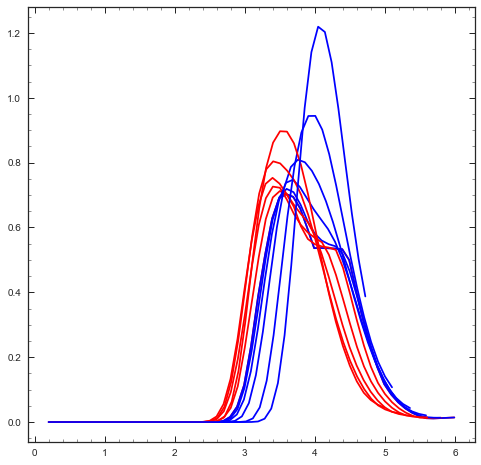

In [58]:
plt.figure(figsize=[8,8])
for idt in range(len(tau)-25):
    lwa1 = lwa_grid_t[idt]
    lwa2 = lwa_grid[17].T[idt]
    chi1 = np.zeros(age.size)
    chi2 = np.zeros(age.size)
    for i in range(len(age)):
        wv,fl = np.load(hpath + 'fsps_models_for_fit/fsps_spec/m0.019_a{0}_t{1}_spec.npy'.format(age[i],tau[idt]))
        sp.Sim_spec_mult(wv,fl)
        ifl = interp1d(sp.mwv,sp.fl)(sp.gal_wv)
        ifl /= sp.filt
        ifl *= Scale_model(sp.gal_fl,sp.gal_er,ifl)    
        chi1[i]=sum(((sp.gal_fl - ifl)/sp.gal_er)**2)

        wv,fl = np.load(hpath + 'fsps_models_for_fit/fsps_spec/m0.019_a{0}_dt{1}_spec.npy'.format(age[i],tau[idt]))
        sp.Sim_spec_mult(wv,fl)
        ifl = interp1d(sp.mwv,sp.fl)(sp.gal_wv)
        ifl /= sp.filt
        ifl *= Scale_model(sp.gal_fl,sp.gal_er,ifl)    
        chi2[i]=sum(((sp.gal_fl - ifl)/sp.gal_er)**2)

    p1 = np.exp(-chi1/2)
    p2 = np.exp(-chi2/2)

    p1 /= np.trapz(p1,lwa1)
    p2 /= np.trapz(p2,lwa2)
    
    m1,l1,h1 = Median_w_Error_cont(p1,lwa1)
    m2,l2,h2 = Median_w_Error_cont(p2,lwa2)

    print(m1-m2)
    
    plt.plot(lwa1,p1,'r')
    plt.plot(lwa2,p2,'b')

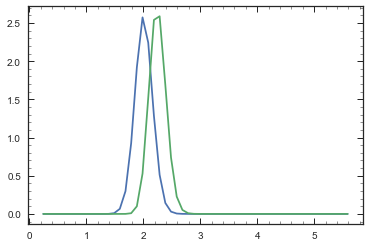

In [18]:
len(lwa)

31